В данной домашней работе все задачи — практические. В них необходимо попытаться применить
все возможные инструменты, которые мы изучали, чтобы ответить на заданный в задаче вопрос.
Не забывайте об одном из самых важных инструментов — визуализации. Ваши решения необходимо
сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа.

Все сопутсвующие файлы находятся в папке hw_2_data

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

**Упражнение 1.** В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?

Примем за гипотезу факт увеличения веса, 𝐻0 если не набирается (лечение не помогает), H1 вес набирается, лечение эффективно

In [9]:
anorexia = pd.read_csv('anorexia.txt', sep='\t')
anorexia['change'] = anorexia['After'] - anorexia['Before']
anorexia

,Before,After,change
0,80.5,82.2,1.7
1,84.9,85.6,0.7
2,81.5,81.4,-0.1
3,82.6,81.9,-0.7
4,79.9,76.4,-3.5
5,88.7,103.6,14.9
6,94.9,98.4,3.5
7,76.3,93.4,17.1
8,81.0,73.4,-7.6
9,80.5,82.1,1.6


In [10]:
anorexia.describe()

,Before,After,change
count,29.000000,29.000000,29.000000
mean,82.689655,85.696552,3.006897
std,4.845495,8.351924,7.308504
min,70.000000,71.300000,-9.100000
25%,80.400000,81.900000,-0.700000
50%,82.600000,83.900000,1.400000
75%,85.000000,90.900000,3.900000
max,94.900000,103.600000,20.900000


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

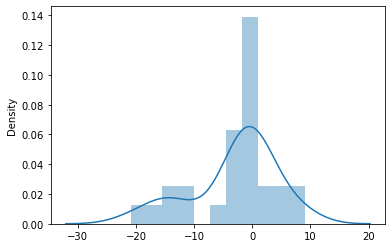

In [17]:
sns.distplot(d)

In [31]:
stats.shapiro(anorexia['Before'])


ShapiroResult(statistic=0.9699368476867676, pvalue=0.5579800605773926)

In [27]:
stats.shapiro(anorexia['After'])

ShapiroResult(statistic=0.9519608616828918, pvalue=0.20574407279491425)

In [ ]:
Исходные распределение можно считать нормальными

In [15]:
anorexia.Before.mean(), anorexia.After.mean()

(82.68965517241381, 85.6965517241379)

In [35]:
d = anorexia.After.fillna(0) - anorexia.Before.fillna(0)
d.mean()

3.006896551724138

In [18]:
stats.ttest_1samp(d, 0)

Ttest_1sampResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

pvalue=0.03502259756218883,
значит Ho отвергаем, H1 принимаем, лечение помогает


**Упражнение 2.** В файле weights.txt записан вес пациентов мужского и женского
пола. Есть ли значимые различия в весе мужчин и женщин?

In [79]:
weights = pd.read_csv('weights.txt', sep='\t')
weights

,Group,Weight
0,Woman,38.9
1,Woman,61.2
2,Woman,73.3
3,Woman,21.8
4,Woman,63.4
5,Woman,64.6
6,Woman,48.4
7,Woman,48.8
8,Woman,48.5
9,Woman,50.1


Гипотеза:

H0:μ1=μ2Средние равны

H1:μ1≠μ2Есть различия

In [68]:
len(weights)


20

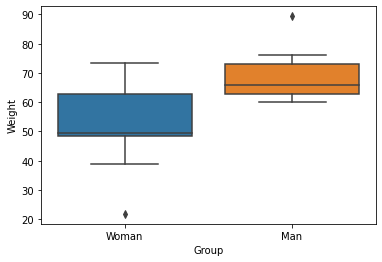

In [81]:
ax = sns.boxplot(x="Group", y="Weight", data=weights)

Применим критерий Стьюдента,сначала надо проверить нормальность данных

In [82]:
sample1 = weights[weights['Group'] == 'Man']['Weight'].to_numpy()
sample2 = weights[weights['Group'] == 'Woman']['Weight'].to_numpy()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

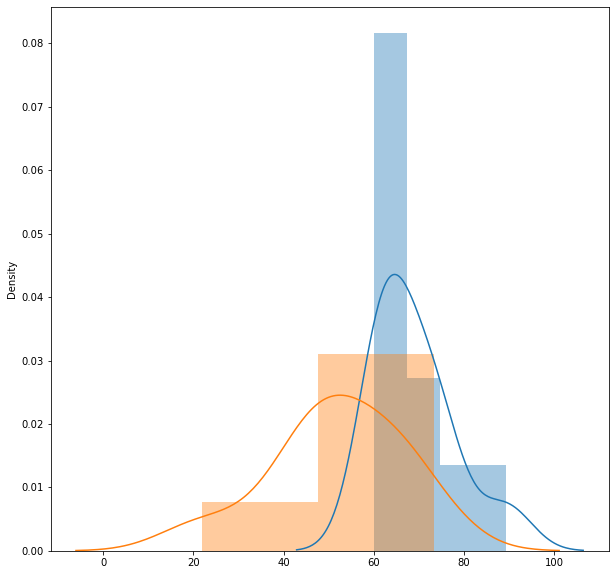

In [83]:
plt.subplots(figsize=(10,10))
sns.distplot(sample1)
sns.distplot(sample2)

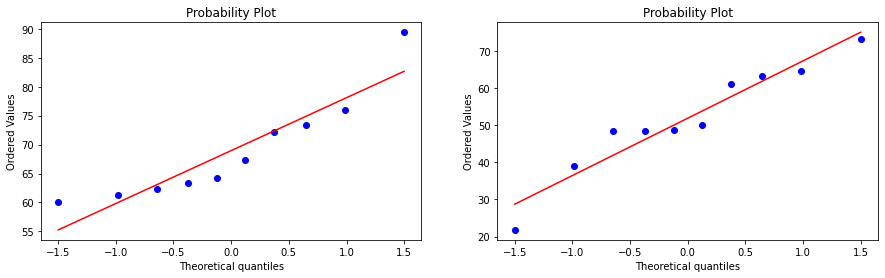

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

stats.probplot(sample1, dist='norm', plot=ax1)
stats.probplot(sample2, dist='norm', plot=ax2)
plt.show()

In [85]:
stats.shapiro(sample1), stats.shapiro(sample2)

(ShapiroResult(statistic=0.8678708672523499, pvalue=0.09440553188323975),
 ShapiroResult(statistic=0.9407824277877808, pvalue=0.5617526769638062))

In [87]:
stats.jarque_bera(sample1), stats.jarque_bera(sample2)

(Jarque_beraResult(statistic=2.3510592791412637, pvalue=0.30865546024322177),
 Jarque_beraResult(statistic=0.5367327289648527, pvalue=0.7646275973873512))


Критерии не отвергают гипотезу о нормальности

In [93]:
stats.ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=3.124146252379086, pvalue=0.006994671118290716)

отвергаем гипотезу H0, есть различия в весе мужчин и женщин

**Упражнение 3.** В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились
ли в среднем цены в этом районе за год?

In [50]:
seattle = pd.read_csv('seattle.txt', sep='\t')
seattle 

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002
...,...,...
95,239.0,2001
96,710.0,2001
97,172.0,2001
98,228.5,2001


Гипотеза:

H0:μ1=μ2Средние равны
H1:μ1≠μ2Есть различия

In [60]:
sample2 = seattle.loc[seattle['Year'] == 2002]['Price']
sample1 = seattle.loc[seattle['Year'] == 2001]['Price']

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

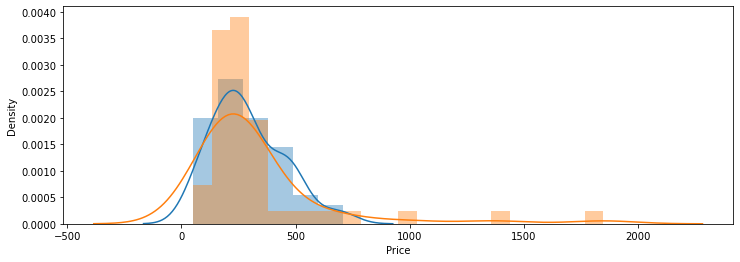

In [61]:
plt.subplots(figsize=(12,4))
sns.distplot(sample1)
sns.distplot(sample2)

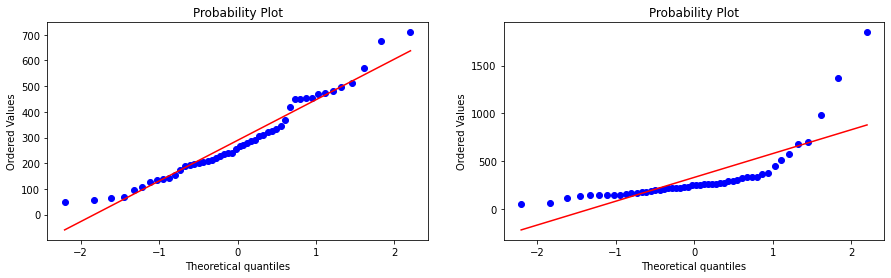

In [62]:
# посмотрим на квантильные графики

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

stats.probplot(sample1, dist='norm', plot=ax1)
stats.probplot(sample2, dist='norm', plot=ax2)
plt.show()

In [63]:
stats.shapiro(sample1), stats.shapiro(sample2)

(ShapiroResult(statistic=0.9515296220779419, pvalue=0.03943965956568718),
 ShapiroResult(statistic=0.6063637733459473, pvalue=2.4237015172623444e-10))

In [64]:
stats.jarque_bera(sample1), stats.jarque_bera(sample2)

(Jarque_beraResult(statistic=3.7368119604139656, pvalue=0.15436953389305508),
 Jarque_beraResult(statistic=336.961347117582, pvalue=0.0))

In [65]:
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)

Гипотезу H0:μ1=μ2 ,что средние равны не отвергаем, цены не сильно изменились



**Упражнение 4.** В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и
после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения
препарата? Данные находятся в файле methylphenidate.txt.

Гипотеза:

H0:μ1=μ2С различий нет,эффекта нет

H1:μ1≠μ2Есть различия

In [79]:
methyl= pd.read_csv('methylphenidate.txt', sep=' ')
methyl.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [82]:
methyl.Methylphenidate.mean(), methyl.Placebo.mean()

(44.708333333333336, 39.75)

In [84]:
d = methyl.Methylphenidate.fillna(0) - methyl.Placebo.fillna(0)
d.mean()

4.958333333333333

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

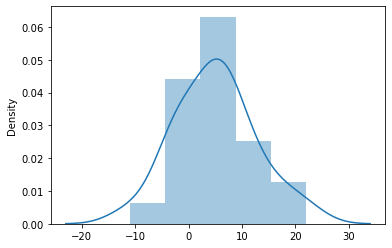

In [85]:
sns.distplot(d)

Распределение похоже на нормальное. Воспользуемся тестом Стьюдента.

In [86]:
stats.ttest_1samp(d, 0)

Ttest_1sampResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

Гипотеза о том, что эффекта нет, отвергается.